In [2]:
# import geopandas and read in a shape file
import geopandas as gpd
df = gpd.read_file(r'C:\GIS\NJ\census\NJ_tract2010.shp')
df.head()

,STATEFP,COUNTYFP,TRACTCE,NAME,TRACTID,TRACTTYP,TRACTLABEL,PARTFLG,VINTAGE,SHAPE_AREA,SHAPE_LEN,geometry
0,34,029,720206,7202.06,34029720206,None,7202.06,N,None,9.584382e+07,50109.358464,POLYGON Z ((546142.3216040917 439853.715661689...
1,34,029,722001,7220.01,34029722001,None,7220.01,N,None,5.318774e+07,40557.706081,POLYGON Z ((557604.6228264272 445271.439406275...
2,34,029,717502,7175.02,34029717502,None,7175.02,N,None,2.071040e+08,77468.160679,POLYGON Z ((545732.5655338429 459045.478459194...
3,34,029,715700,7157,34029715700,None,7157.00,N,None,8.438929e+07,44456.764035,POLYGON Z ((560674.5290881768 451325.997507110...
4,34,029,715500,7155,34029715500,None,7155.00,N,None,7.277090e+07,39175.173798,POLYGON Z ((559900.222237844 460672.2042083591...


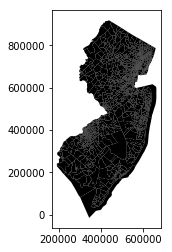

In [3]:
# start with a magic command for jupter notebook
%matplotlib inline
# plot
df.plot(color='black')

In [4]:
# find out what we are looking at
df.geom_type.head()

0    Polygon
1    Polygon
2    Polygon
3    Polygon
4    Polygon
dtype: object

In [5]:
# give me the coordinate reference system, this is a projection example 
df.crs

{'proj': 'tmerc',
 'lat_0': 38.83333333333334,
 'lon_0': -74.5,
 'k': 0.9999,
 'x_0': 150000,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

In [6]:
# convert to json
df.to_json()

#Now convert and write to a new file
df.to_file(driver='GeoJSON', filename =r'C:\GIS\NJ\census\NJ_tract2010.geojson')

In [8]:
# ooh, look at all these file formats
import fiona; fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [10]:
# now lets play with OGR
!ogrinfo --formats

Supported Formats:
  PCIDSK -raster,vector- (rw+v): PCIDSK Database File
  netCDF -raster,vector- (rw+s): Network Common Data Format
  JP2OpenJPEG -raster,vector- (rwv): JPEG-2000 driver based on OpenJPEG library
  PDF -raster,vector- (w+): Geospatial PDF
  DB2ODBC -raster,vector- (rw+): IBM DB2 Spatial Database
  ESRI Shapefile -vector- (rw+v): ESRI Shapefile
  MapInfo File -vector- (rw+v): MapInfo File
  UK .NTF -vector- (ro): UK .NTF
  OGR_SDTS -vector- (ro): SDTS
  S57 -vector- (rw+v): IHO S-57 (ENC)
  DGN -vector- (rw+): Microstation DGN
  OGR_VRT -vector- (rov): VRT - Virtual Datasource
  REC -vector- (ro): EPIInfo .REC 
  Memory -vector- (rw+): Memory
  BNA -vector- (rw+v): Atlas BNA
  CSV -vector- (rw+v): Comma Separated Value (.csv)
  NAS -vector- (ro): NAS - ALKIS
  GML -vector- (rw+v): Geography Markup Language (GML)
  GPX -vector- (rw+v): GPX
  KML -vector- (rw+v): Keyhole Markup Language (KML)
  GeoJSON -vector- (rw+v): GeoJSON
  OGR_GMT -vector- (rw+): GMT ASCII Vectors (

In [18]:
!ogr2ogr -f "GeoJSON" "C:\Users\jolynn\UntitledFolder\data\mtbs_fod_pts_20170501..json" "C:\Users\jolynn\UntitledFolder\data\mtbs_fod_pts_20170501.shp"

Warning 1: The output driver does not natively support Date type for field RelDate. Misconversion can happen. -mapFieldType can be used to control field type conversion.


In [19]:
from osgeo import ogr
source = ogr.Open(r"C:\Users\jolynn\UntitledFolder\data\mtbs_fod_pts_20170501.shp")
layer = source.GetLayer()
schema = []
ldefn = layer.GetLayerDefn()

In [21]:
for n in range(ldefn.GetFieldCount()):
    fdefn = ldefn.GetFieldDefn(n)
    schema.append(fdefn.name)
print(schema)
# ok this all takes to many lines of code, geopandas are your friends

['FIRE_ID', 'FIRENAME', 'ASMNT_TYPE', 'PRE_ID', 'POST_ID', 'ND_T', 'IG_T', 'LOW_T', 'MOD_T', 'HIGH_T', 'FIRE_YEAR', 'FIRE_MON', 'FIRE_DAY', 'LAT', 'LONG', 'WRS_PATH', 'WRS_ROW', 'P_ACRES', 'R_ACRES', 'STATE', 'ADMIN', 'MTBS_ZONE', 'GACC', 'HUC4_CODE', 'HUC4_NAME', 'Version', 'RevCode', 'RelDate', 'Fire_Type']


In [22]:
# now for rasters
import rasterio
dataset = rasterio.open(r"C:\GIS\NJ_Landsat8\LC08_L1TP_014032_20150826_20170225_01_T1_B1.tif")

In [25]:
# how many layers
dataset.count

BoundingBox(left=395685.0, bottom=4346385.0, right=627915.0, top=4582215.0)

In [26]:
# what are the attributes
dataset.width

7741

In [27]:
dataset.height

7861

In [28]:
dataset.bounds

BoundingBox(left=395685.0, bottom=4346385.0, right=627915.0, top=4582215.0)

In [29]:
dataset.crs

CRS({'init': 'epsg:32618'})

In [31]:
band1 = dataset.read(1)
band1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

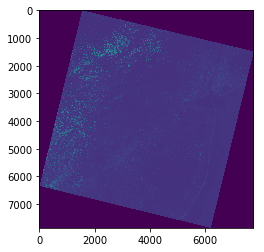

In [32]:
%matplotlib inline
from matplotlib import pyplot
pyplot.imshow(dataset.read(1))
pyplot.show()